In [19]:
import os 
os.chdir('/root/patrec_time_series/')

# sys.path.append(str(Path(os.getcwd()).parent))

from patrec.generation.ts_generators import *
from patrec.generation.ts_noise_generators import *
from patrec.generation.ts_creation import *
from patrec.utils.visuals import *

# create generators

In [22]:
# trends
gen_lin = TS_generator(linear_trend, 'patrec/generation/base_configs/trend/basic_linear_trend.yaml')
gen_quad = TS_generator(quadratic_trend, 'patrec/generation/base_configs/trend/basic_quadratic_trend.yaml')
gen_exp = TS_generator(exponential_trend, 'patrec/generation/base_configs/trend/basic_exponential_trend.yaml')
# seasonality
wavegen_sin = TS_generator(sin_wave, 'patrec/generation/base_configs/wave/basic_sin_wave.yaml')
wavegen_saw = TS_generator(sawtooth_wave, 'patrec/generation/base_configs/wave/basic_saw_wave.yaml')
# shifts
shiftgen_harm = TS_generator(harmonic_shift, 'patrec/generation/base_configs/shift/basic_harmonic_shift.yaml')
shiftgen_saw = TS_generator(sawtooth_shift, 'patrec/generation/base_configs/shift/basic_sawtooth_shift.yaml')
normal_gen = Noise_generator(normal_noise, 'patrec/generation/base_configs/noise/basic_normal_noise.yaml', length=101)
normal_gen.config['noise_pct_d'] = 0.1
normal_gen.config['noise_pct_u'] = 0.2

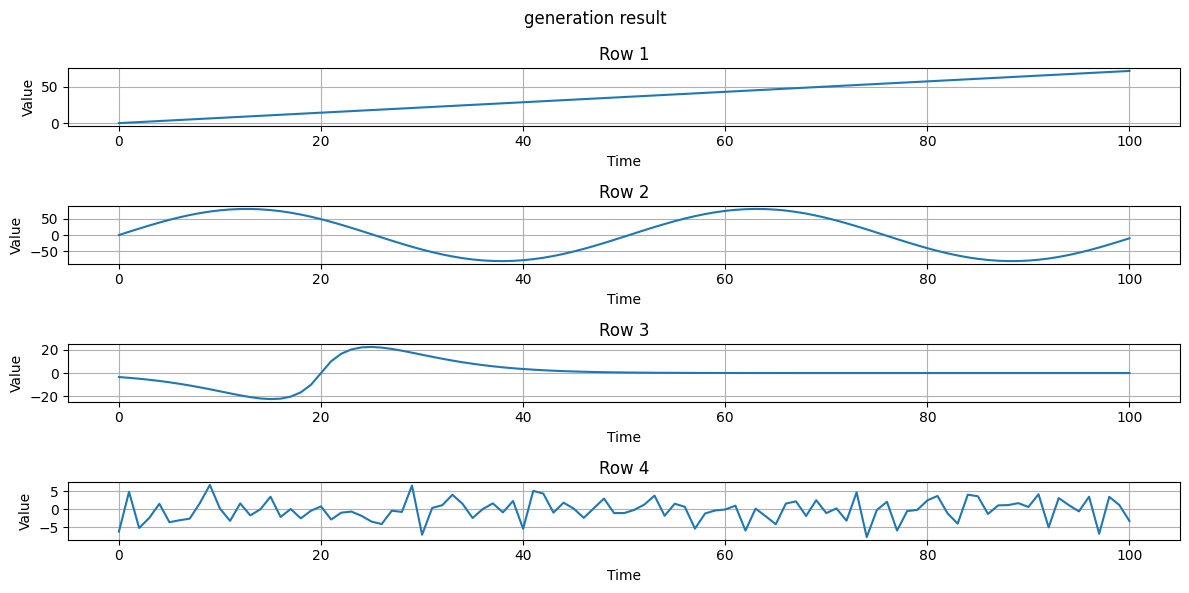

In [23]:
plot_series_grid([gen_lin.generate(random_state=2)[0], wavegen_sin.generate(random_state=2)[0], shiftgen_harm.generate(random_state=2)[0], normal_gen.generate()[0]], plot_title='generation result')


# make blocks

{'trend': {'hash': '37939787d1997a8db6a26b181632d897', 'params': {'general': {'length': 101, 'type': 'TS_generator', 'generator_name': 'linear_trend'}, 'gen_params': {'slope': 0.722, 'length': 101}}}} [ 0.     0.722  1.444  2.166  2.888  3.61   4.332  5.054  5.776  6.498
  7.22   7.942  8.664  9.386 10.108 10.83  11.552 12.274 12.996 13.718
 14.44  15.162 15.884 16.606 17.328 18.05  18.772 19.494 20.216 20.938
 21.66  22.382 23.104 23.826 24.548 25.27  25.992 26.714 27.436 28.158
 28.88  29.602 30.324 31.046 31.768 32.49  33.212 33.934 34.656 35.378
 36.1   36.822 37.544 38.266 38.988 39.71  40.432 41.154 41.876 42.598
 43.32  44.042 44.764 45.486 46.208 46.93  47.652 48.374 49.096 49.818
 50.54  51.262 51.984 52.706 53.428 54.15  54.872 55.594 56.316 57.038
 57.76  58.482 59.204 59.926 60.648 61.37  62.092 62.814 63.536 64.258
 64.98  65.702 66.424 67.146 67.868 68.59  69.312 70.034 70.756 71.478
 72.2  ]
{'general': {'length': 101, 'type': 'Noise_generator', 'generator_name': 'normal

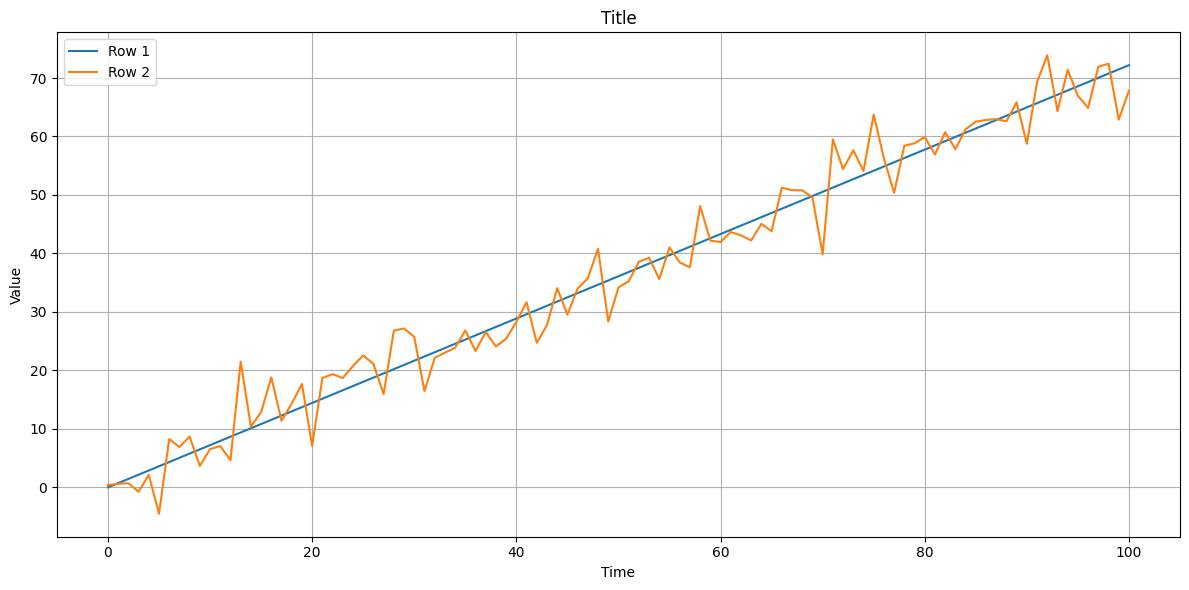

In [24]:
# linear trend 
block1 = TS_Block()
row, meta = gen_lin.generate()
block1.add_component(TS_component(row, meta, 'trend'))
print(block1.get_metadata(), block1.get_series())
ts1 = block1.get_series()
# add noise
row_with_noise, meta_new = normal_gen.generate(data=ts1, random_state=5)
print(meta_new)
block1.add_component(TS_component(row_with_noise, meta_new, 'noise'))
print(block1.get_metadata(), block1.get_series())
ts2 = block1.get_series()

plot_series([ts1, ts2])

# use block generators 

In [25]:
gen_lin.config.pop('random_state')
wavegen_sin.config.pop('random_state')
shiftgen_harm.config.pop('random_state')
normal_gen.config.pop('random_state')

5

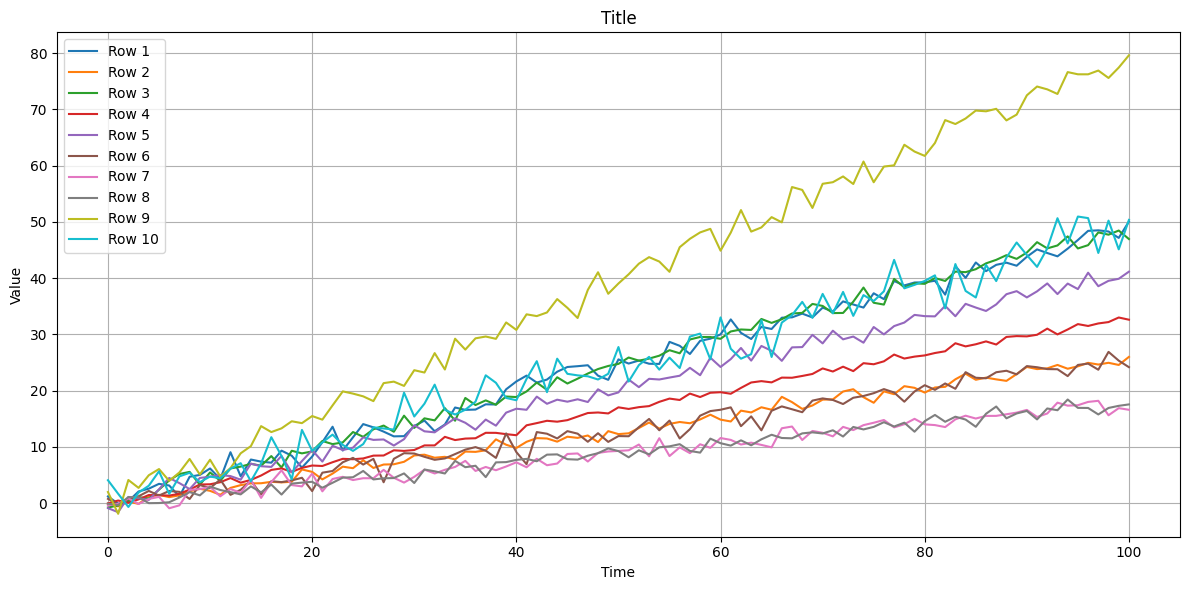

{'noise': {'hash': 'fb4fedea2159653a5d44ccb483f39190', 'params': {'general': {'length': 101, 'type': 'Noise_generator', 'generator_name': 'normal_noise'}, 'gen_params': {'noise_pct': 0.089}}}, 'trend': {'hash': 'a4deec4ba3ed697f211f754fa75d3099', 'params': {'general': {'length': 101, 'type': 'TS_generator', 'generator_name': 'linear_trend'}, 'gen_params': {'slope': 0.489, 'length': 101}}}}
{'noise': {'hash': 'fb4fedea2159653a5d44ccb483f39190', 'params': {'general': {'length': 101, 'type': 'Noise_generator', 'generator_name': 'normal_noise'}, 'gen_params': {'noise_pct': 0.089}}}, 'trend': {'hash': '8fc6f81c575aec0c287e11e5fac3b53e', 'params': {'general': {'length': 101, 'type': 'TS_generator', 'generator_name': 'linear_trend'}, 'gen_params': {'slope': 0.256, 'length': 101}}}}
{'noise': {'hash': '16fea92f7898444d5715875d86625a8f', 'params': {'general': {'length': 101, 'type': 'Noise_generator', 'generator_name': 'normal_noise'}, 'gen_params': {'noise_pct': 0.067}}}, 'trend': {'hash': 'a4

In [26]:
gen1 = Block_generator()

normal_gen.config['noise_pct_d'] = 0
normal_gen.config['noise_pct_p'] = 0.05
normal_gen.config['noise_pct_q'] = 10

lts = []
meta = []
for _ in range(10):
    result = gen1.generate_block(trend_gen=gen_lin, noise_gen=normal_gen)
    lts.append(result.get_series())
    meta.append(result.get_metadata())

plot_series(lts)

for item in meta:
    print(item)

# final sample function

In [27]:
params_grid = {
    'noise_level': [[0, 0], [0.01, 0.05], [0.05, 0.1], [0.1, 0.2]],
    'shifts': [0, 1],
    'value_scale': [[0, 1], [100, 800], [1000, 9000]],
    'ts_length': [101, 501, 1001, 10000]
}

In [28]:
from typing import Literal, Any
import numpy as np

def apply_noise(noise_generator, var:Literal[1,2,3,4]):    
    # noise levels
    noise_lvls = {
        1: {'noise_pct_d':0, 'noise_pct_u':0, 'noise_pct_q':1},
        2: {'noise_pct_d':0.01, 'noise_pct_u':0.05, 'noise_pct_q':10},
        3: {'noise_pct_d':0.05, 'noise_pct_u':0.1, 'noise_pct_q':100},
        4: {'noise_pct_d':0.1, 'noise_pct_u':0.2, 'noise_pct_q':100}
    }
    # update values
    noise_generator.config['noise_pct_d'] = noise_lvls[var].get('noise_pct_d')
    noise_generator.config['noise_pct_u'] = noise_lvls[var].get('noise_pct_u')
    noise_generator.config['noise_pct_q'] = noise_lvls[var].get('noise_pct_q')
    # generate noise 
    return noise_generator

def apply_scale(rows:Any, var:Literal[1,2,3,4]):
    """
    Нормирует все функции в этом диапазоне
    """
    scale_lvls = {
        1: {'scale_d':0, 'scale_u':1},
        2: {'scale_d':5, 'scale_u':100},
        3: {'scale_d':100, 'scale_u':800},
        4: {'scale_d':1000, 'scale_u':9000},
    }
    
    if not isinstance(rows, np.ndarray):
        rows = np.asarray(rows)
    
    min_val, max_val = rows.min(), rows.max()
    
    return np.asarray([scale_lvls[var]['scale_d'] + (row - min_val) * (scale_lvls[var]['scale_u'] - scale_lvls[var]['scale_d']) / (max_val - min_val) for row in rows]) 

def get_sample(sample_size:int, gens:dict, scale_code:int=0, noise_code:int=0):
    """
    Manual sample generation
    """    
    block = Block_generator()
    series, meta = [], [] 

    for _ in range(sample_size):
        if noise_code != 0:
            gens['noise'] = apply_noise(gens.get('noise'), noise_code)
        row = block.generate_block(gens.get('trend'), gens.get('wave'), gens.get('shift'), gens.get('noise'))
        if scale_code != 0:
            row = apply_scale(row.get_series(), scale_code)
        series.append(row.get_series())
        meta.append(row.get_metadata())
        
    return {"data":series, "meta":meta}

import json
import numpy as np
from sklearn.preprocessing import LabelEncoder
from pathlib import Path

def save_to_json(data, filepath):
    def convert(o):
        if isinstance(o, np.ndarray):
            return o.tolist()
        if isinstance(o, np.generic):
            return o.item()
        raise TypeError(f"Object of type {o.__class__.__name__} is not JSON serializable")

    le = LabelEncoder()
    labels_encoded = le.fit_transform(['_'.join([item[k]['hash'] if k != 'noise' else '' for k in item.keys()]) for item in data['meta']])
    
    data['labels'] = labels_encoded
    
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4, default=convert)

In [ ]:
#
# gen_lin.config['slope_d'] = 0.1
# gen_lin.config['slope_u'] = 0.8
# gen_lin.config['slope_q'] = 10
# print(gen_quad.config)
# 
# wavegen_sin.config['frequency_d'] = 2
# wavegen_sin.config['frequency_u'] = 8
# wavegen_sin.config['frequency_q'] = 7
# print(wavegen_saw.config)
# wavegen_saw.config['frequency_d'] = 2
# wavegen_saw.config['frequency_u'] = 8
# wavegen_saw.config['frequency_q'] = 7
# print(shiftgen_harm.config)

generators1 = {
    "trend": gen_lin,
    'wave': wavegen_saw, 
    'noise': normal_gen    
}

sample_params = {
    'filepath': 'data/Synthetic_data/17_06_samples/exp_saw/',
    'sample_name': "sample1",
    'sample_size': 10,
    'noise_code': 4,
    'scale_code': 0
}

In [199]:
sample1 = get_sample(sample_params['sample_size'], generators1, sample_params['scale_code'], sample_params['noise_code'])

filename = "_".join([sample_params['sample_name'], str(sample_params['sample_size']), str(sample_params['noise_code']), str(sample_params['scale_code'])])

plot_series(sample1['data'], show_legend=False, save_path=Path(sample_params['filepath']) / f'pics/repr_{filename}.png')

save_to_json(sample1, f'{sample_params["filepath"]}/{filename}.json')

for k,v in generators1.items():
    save_config_file(v.config, f'{sample_params["filepath"]}/configs/{k}.yaml')